In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet
import sklearn
import cpi
import seaborn as sns

import prepare
import explore
#needed for matplotlib to handle plotting pandas
pd.plotting.register_matplotlib_converters()


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:cpi:Parsing data files from the BLS


### Acquire 

#### Coffee Data

We initially attempted to use ICO data to produce a model that would predict the global commodity coffee price. Very quickly, we found this question to be impossibly broad, and instead to focus on one country, Colombia.

ICO's data was insufficiently specific, and it only went back until 1990. We began searching for other data sources and ultimately found the National Federation of Coffee Growers of Colombia, commonly abbreviated FedCafe.

After some difficulty with the language barrier, we downloaded a few Excel files that detailed the export coffee prices for Excelso coffee. Excelso is a size grading of coffee which is one size smaller than largest, and is the most commonly exported Colombian coffee.

#### Weather Data

In [3]:
df = prepare.get_data()

### Prep

In [4]:
df2 = prepare.get_prepped()

### Exploration

Top Coffee Producing Regions of Colombia


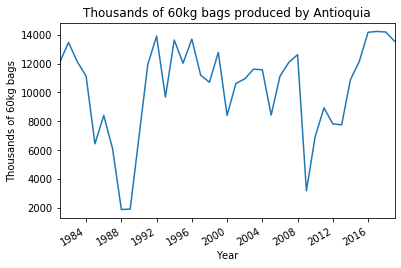

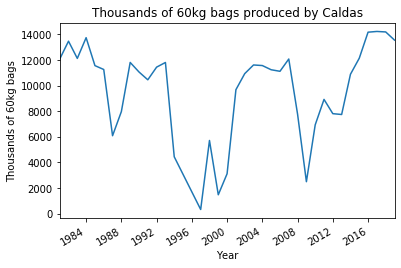

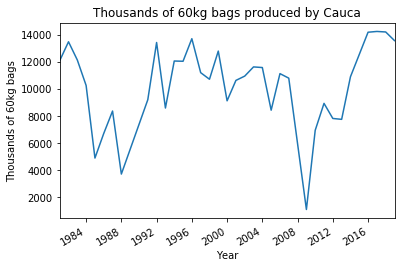

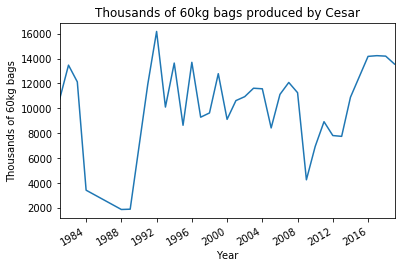

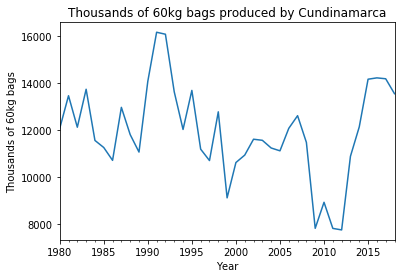

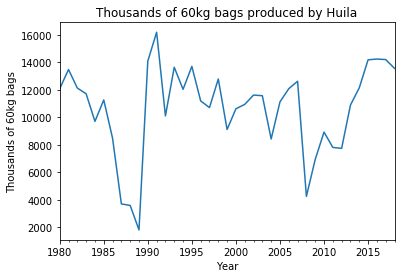

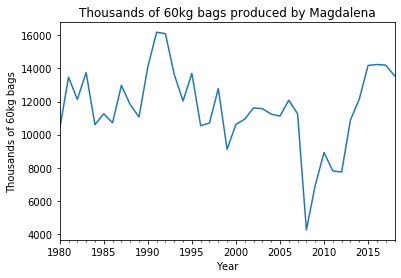

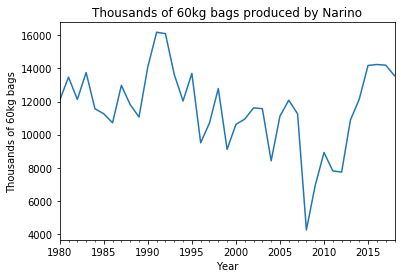

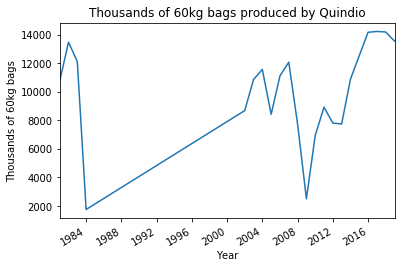

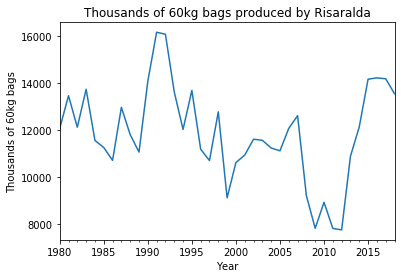

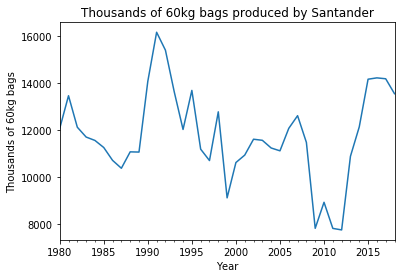

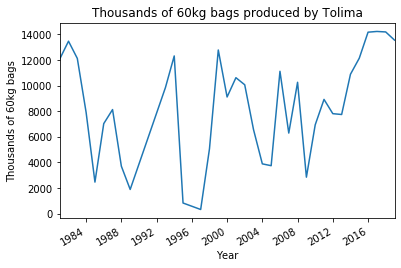

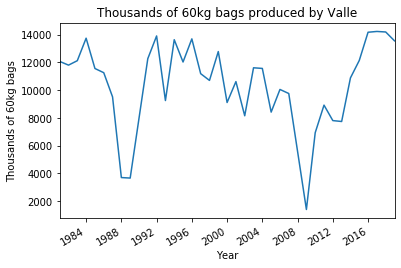

In [5]:
# Production by region 1980-2018
explore.production_by_region(df)

Average precipitation by Region of Colombia


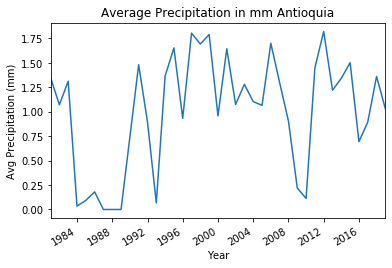

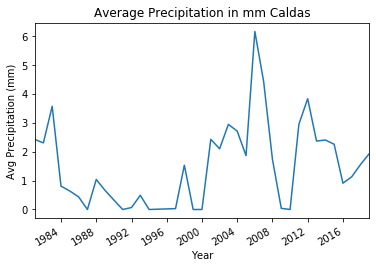

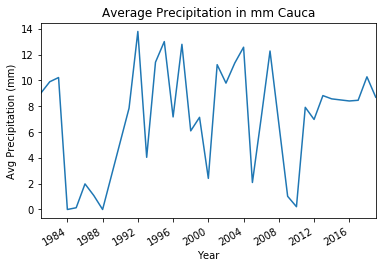

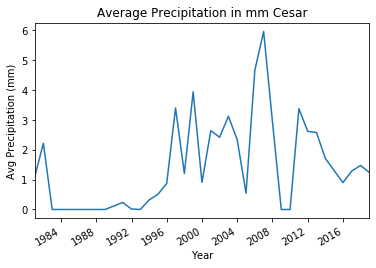

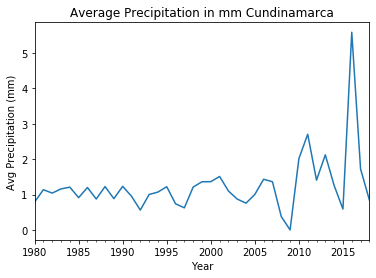

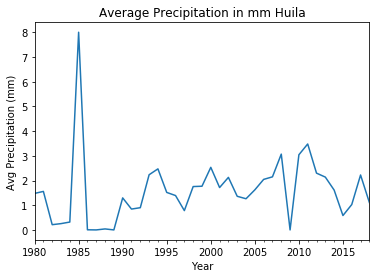

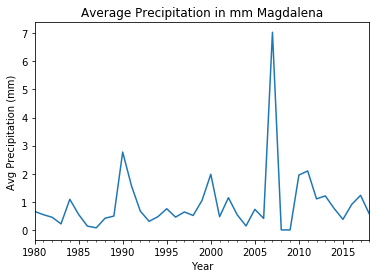

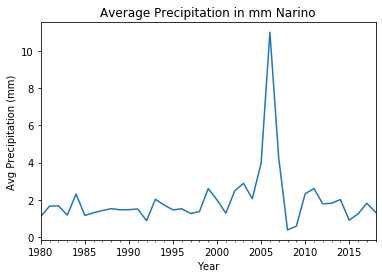

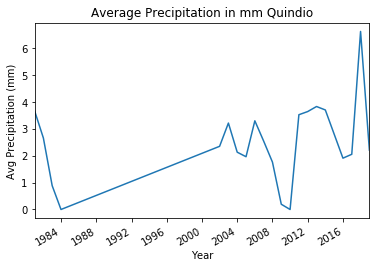

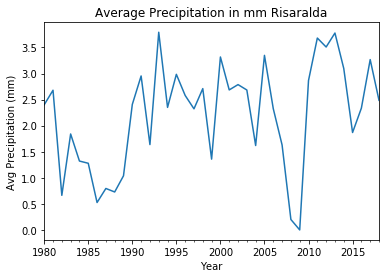

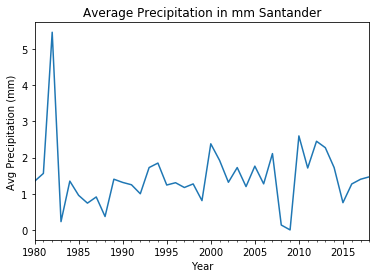

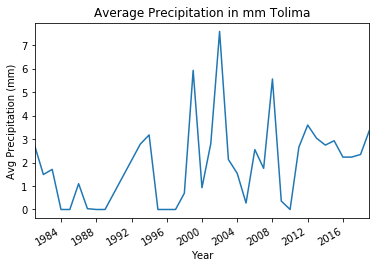

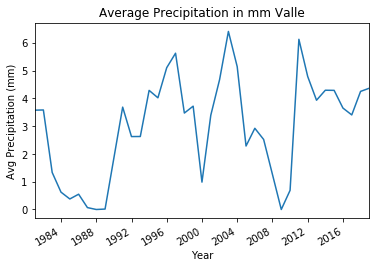

In [6]:
#Precipitation by region
explore.precipitation_by_region(df)

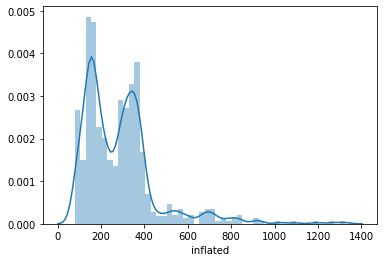

In [7]:
#After reviewing the data distribution we saw that the pricing was bimodal
#Splitting the data for modeling was greatly improved based on this analysis
sns.distplot(df.inflated)

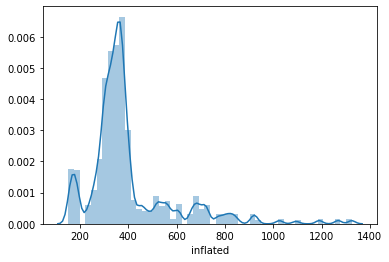

In [8]:
#pre 1991
sns.distplot(df.inflated[:"1991"])

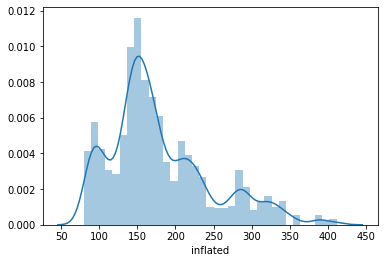

In [9]:
#post 1991
sns.distplot(df.inflated["1991":])

### Model